<a href="https://colab.research.google.com/github/gcosma/COP509/blob/main/LabSolutions/Lab_Exercise_(No_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab Exercise (No. 3)**

**Task Overview**

Your task is to use the cleaned ArtReviews dataset and the ArtRatings(classes) and repeat the Lab Tutorial (Day 4 lab tutorial). Briefly outline in bullets the main findings.

1. How to prepare art review text data for classification with deep learning methods.
2. How to learn a word embedding as part of fitting a deep learning model.
3. How to learn a standalone word embedding and how to use a pre-trained embedding in a neural network model.


###***pre-work1: mount drive***

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


###***pre-work2: set datasets***

In [ ]:
data_path = "/content/drive/My Drive/Colab Notebooks/21COP509/LabDatasets/"
!ls "/content/drive/My Drive/Colab Notebooks/21COP509/LabDatasets/"

datasets = 'Arts5000' # ArtsAll, Arts5000


if datasets == 'ArtsAll':
  # Arts all
  data_all_reviews = 'ArtsReviews.txt'
  data_all_ratings = 'ArtsRatings.txt'
  data_train_reviews = 'ArtsReviews_train.txt'
  data_test_reviews = 'ArtsReviews_test.txt'
  data_train_ratings = 'ArtsRatings_train.txt'
  data_test_ratings = 'ArtsRatings_test.txt'
else:
  # Arts 5000
  data_all_reviews = 'Reduced_ArtsReviews_5000.txt'
  data_all_ratings = 'Reduced_ArtsRatings_5000.txt'
  data_train_reviews = 'ArtsReviews_5000_train.txt'
  data_test_reviews = 'ArtsReviews_5000_test.txt'
  data_train_ratings = 'ArtsRatings_5000_train.txt'
  data_test_ratings = 'ArtsRatings_5000_test.txt'

ArtsRatings_5000_test.txt   ArtsReviews_5000_train.txt	Reduced_ArtsRatings_5000.txt
ArtsRatings_5000_train.txt  glove.6B.100d.txt		Reduced_ArtsReviews_5000.txt
ArtsReviews_5000_test.txt   metamorphosis_clean.txt	review_polarity


##**1. Train Embedding Layer for Classification**


In [ ]:
!pip install tensorflow
!pip install nltk
!pip install numpy
!pip install pandas
!pip install matplotlib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


17063
[('The', 2029), ('machine', 1882), ('use', 1427), ('one', 1321), ('It', 1271), ('would', 1236), ('This', 1039), ('get', 1007), ('like', 966), ('product', 927), ('good', 877), ('paper', 875), ('sewing', 822), ('great', 760), ('time', 712), ('well', 695), ('used', 687), ('work', 670), ('bought', 622), ('dont', 618), ('really', 613), ('little', 608), ('thread', 569), ('even', 540), ('make', 534), ('much', 505), ('Im', 486), ('buy', 478), ('quality', 478), ('price', 473), ('easy', 464), ('got', 455), ('made', 442), ('first', 435), ('could', 430), ('back', 410), ('Ive', 395), ('using', 391), ('scissors', 388), ('If', 387), ('small', 383), ('need', 382), ('better', 381), ('Its', 369), ('also', 367), ('set', 365), ('two', 364), ('still', 357), ('They', 356), ('My', 355)]
7702
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 - 17s - 137ms/step - accuracy: 0.2080 - loss: 1.6079
Epoch 2/15
125/125 - 15s - 117ms/step - accuracy: 0.3413 - loss: 1.4894
Epoch 3/15
125/125 - 15s - 116ms/step - accuracy: 0.5792 - loss: 1.0287
Epoch 4/15
125/125 - 21s - 166ms/step - accuracy: 0.7840 - loss: 0.5738
Epoch 5/15
125/125 - 15s - 118ms/step - accuracy: 0.9093 - loss: 0.2930
Epoch 6/15
125/125 - 22s - 177ms/step - accuracy: 0.9762 - loss: 0.1200
Epoch 7/15
125/125 - 20s - 159ms/step - accuracy: 0.9955 - loss: 0.0418
Epoch 8/15
125/125 - 15s - 118ms/step - accuracy: 0.9992 - loss: 0.0171
Epoch 9/15
125/125 - 15s - 119ms/step - accuracy: 0.9998 - loss: 0.0087
Epoch 10/15
125/125 - 20s - 162ms/step - accuracy: 1.0000 - loss: 0.0056
Epoch 11/15
125/125 - 15s - 116ms/step - accuracy: 1.0000 - loss: 0.0038
Epoch 12/15
125/125 - 21s - 167ms/step - accuracy: 1.0000 - loss: 0.0027
Epoch 13/15
125/125 - 15s - 121ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 14/15
125/125 - 23s - 183ms/step - accuracy: 1.0000 - loss: 0.001

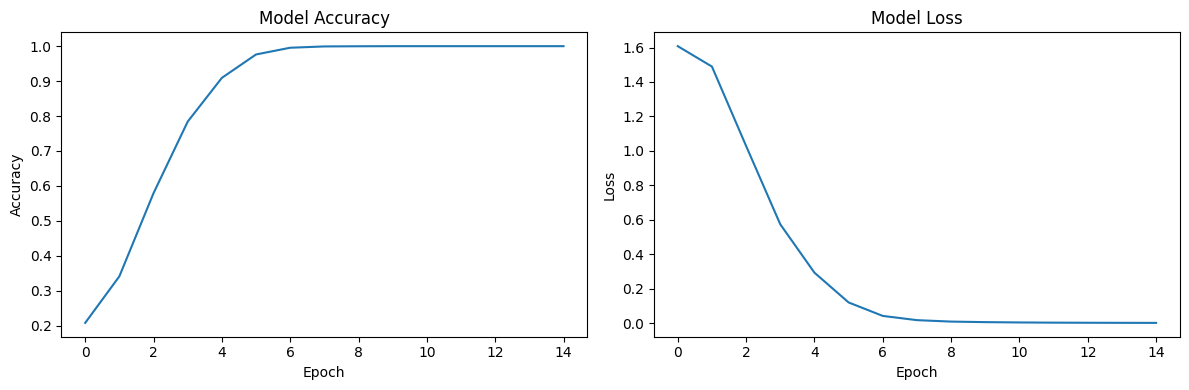

In [4]:
# Deep learning imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Data processing and utilities
import numpy
from numpy import array
from collections import Counter
import random
import matplotlib.pyplot as plt

# Text processing
import nltk
from nltk.corpus import stopwords
from string import punctuation
from os import listdir
nltk.download('stopwords')

# load doc into memory
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc_vocab(doc):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    doc = load_doc(filename)
    tokens = clean_doc_vocab(doc)
    vocab.update(tokens)

# save list to file
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

# load doc into memory
def load_doc_lines(filename):
    file = open(filename,'rt')
    lines = list()
    while 1:
        line = file.readline()
        if not line:
            break
        lines.append(line.strip("\n"))
    file.close()
    return lines

# load doc, clean and return line of tokens
def doc_to_line(doc, vocab):
    tokens = clean_doc(doc, vocab)
    return ' '.join(tokens)

# turn a doc into clean tokens
def clean_doc(doc, vocab):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [w for w in tokens if w in vocab]
    return tokens

# load all docs in a directory
def process_docs(files, vocab):
    lines = list()
    for doc in files:
        line = doc_to_line(doc, vocab)
        lines.append(line)
    return lines

# define vocab
vocab = Counter()
add_doc_to_vocab(data_path + data_train_reviews, vocab)
print(len(vocab))
print(vocab.most_common(50))

# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

# load train and test sets
ArRe_train_lines = load_doc_lines(data_path + data_train_reviews)
ArRa_train_lines = numpy.loadtxt(data_path + data_train_ratings, dtype = float)
ArRe_test_lines = load_doc_lines(data_path + data_test_reviews)
ArRa_test_lines = numpy.loadtxt(data_path + data_test_ratings, dtype = float)

train_docs = process_docs(ArRe_train_lines, vocab)
test_docs = process_docs(ArRe_test_lines, vocab)

# create and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)

# prepare training data
encoded_docs = tokenizer.texts_to_sequences(train_docs)
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# prepare test data
encoded_docs = tokenizer.texts_to_sequences(test_docs)
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# prepare labels
ytrain = array(ArRa_train_lines) - 1
ytest = array(ArRa_test_lines) - 1
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# define and compile model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network and store history
history = model.fit(Xtrain, ytrain, epochs=15, verbose=2)

# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

# plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

Arts All Test Accuracy: 62.348104

Arts 5000 Test Accuracy: 39.100000

## **2. Train Standalone Word Embedding (word2vec: embedding_word2vec.txt)**



In [5]:
pip install --upgrade gensim

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models import Word2Vec
import random
import nltk
import numpy as np

# Download required NLTK data
nltk.download('stopwords')

def load_doc(filename):
    """Load document from file."""
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

def clean_doc_vocab(doc):
    """Clean document text for vocabulary building."""
    # Split into tokens by white space
    tokens = doc.split()

    # Remove punctuation
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]

    # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]

    # Remove short tokens
    tokens = [word for word in tokens if len(word) > 1]

    # Convert to lowercase
    tokens = [word.lower() for word in tokens]

    # Apply stemming
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]

    return tokens

def add_doc_to_vocab(filename, vocab):
    """Add document tokens to vocabulary counter."""
    doc = load_doc(filename)
    tokens = clean_doc_vocab(doc)
    vocab.update(tokens)

def save_list(lines, filename):
    """Save list to file."""
    data = '\n'.join(lines)
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(data)

def random_sample(num1, num2):
    """Generate random train/test split indices."""
    data_list = list(range(num1))
    train_index = []

    for _ in range(num2):
        rand_index = int(random.uniform(0, len(data_list)))
        train_index.append(data_list[rand_index])
        del data_list[rand_index]

    test_index = data_list
    return train_index, test_index

def load_doc_lines(filename):
    """Load document as lines."""
    with open(filename, 'r', encoding='utf-8') as file:
        lines = [line.strip() for line in file]
    return lines

def clean_doc(doc, vocab):
    """Clean document text using predefined vocabulary."""
    tokens = doc.split()

    # Remove punctuation
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]

    # Convert to lowercase
    tokens = [word.lower() for word in tokens]

    # Apply stemming
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]

    # Filter using vocabulary
    tokens = [w for w in tokens if w in vocab]

    return tokens

def doc_to_clean_lines(doc, vocab):
    """Convert document to clean lines using vocabulary."""
    clean_lines = []
    lines = doc.splitlines()

    for line in lines:
        tokens = clean_doc(line, vocab)
        if tokens:  # Only add non-empty lines
            clean_lines.append(tokens)

    return clean_lines

def process_docs(files, vocab):
    """Process multiple documents."""
    lines = []
    for doc in files:
        doc_lines = doc_to_clean_lines(doc, vocab)
        lines.extend(doc_lines)
    return lines

# Main processing pipeline
def main():
    # Initialize vocabulary
    vocab = Counter()

    # Add documents to vocabulary
    add_doc_to_vocab(data_path + data_train_reviews, vocab)
    print(f"Initial vocabulary size: {len(vocab)}")
    print("Top 50 words:", vocab.most_common(50))

    # Filter vocabulary by minimum occurrence
    min_occurrence = 2
    tokens = [k for k, c in vocab.items() if c >= min_occurrence]
    print(f"Filtered vocabulary size: {len(tokens)}")

    # Save vocabulary
    save_list(tokens, 'vocab.txt')

    # Load vocabulary
    vocab = set(load_doc('vocab.txt').split())
    print(f"Loaded vocabulary size: {len(vocab)}")

    # Load training and test data
    train_reviews = load_doc_lines(data_path + data_train_reviews)
    train_ratings = np.loadtxt(data_path + data_train_ratings, dtype=float)
    test_reviews = load_doc_lines(data_path + data_test_reviews)
    test_ratings = np.loadtxt(data_path + data_test_ratings, dtype=float)

    # Process documents
    train_docs = process_docs(train_reviews, vocab)
    test_docs = process_docs(test_reviews, vocab)

    # Train Word2Vec model
    model = Word2Vec(
        sentences=train_docs,
        vector_size=100,
        window=5,
        workers=8,
        min_count=1,
        sg=1  # Skip-gram model (preferred for small datasets)
    )

    print(f'Vocabulary size in Word2Vec model: {len(model.wv.index_to_key)}')

    # Save Word2Vec model
    model.wv.save_word2vec_format('embedding_word2vec.txt', binary=False)

if __name__ == "__main__":
    main()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Initial vocabulary size: 10842
Top 50 words: [('use', 2673), ('the', 2092), ('machin', 2063), ('it', 1681), ('one', 1534), ('work', 1393), ('get', 1296), ('would', 1286), ('sew', 1162), ('like', 1110), ('thi', 1069), ('product', 1059), ('make', 963), ('good', 949), ('paper', 948), ('time', 931), ('great', 865), ('well', 783), ('need', 749), ('thread', 740), ('look', 735), ('dont', 696), ('color', 660), ('buy', 657), ('bought', 653), ('realli', 639), ('tri', 632), ('cut', 622), ('littl', 616), ('even', 609), ('purchas', 608), ('order', 595), ('want', 560), ('price', 534), ('much', 527), ('year', 520), ('go', 518), ('easi', 508), ('love', 506), ('thing', 504), ('im', 502), ('qualiti', 500), ('also', 499), ('set', 474), ('item', 471), ('got', 471), ('first', 468), ('made', 455), ('back', 451), ('stitch', 447)]
Filtered vocabulary size: 4824
Loaded vocabulary size: 4824
Vocabulary size in Word2Vec model: 4824


## **3. Use Pre-trained Embedding for Classification**


In [ ]:
!pip install tensorflow
!pip install gensim

###***use embedding_word2vec.txt***

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import numpy as np
import random
from string import punctuation
from os import listdir

# Download required NLTK data
nltk.download('stopwords')

# Load doc into memory
def load_doc(filename):
    with open(filename, 'r') as file:
        return file.read()

# Clean document for vocabulary building
def clean_doc_vocab(doc):
    # Split into tokens by white space
    tokens = doc.split()
    # Remove punctuation
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # Filter tokens
    tokens = [word.lower() for word in tokens if word.isalpha() and len(word) > 1]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]
    # Stem words
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    return tokens

# Add document to vocabulary
def add_doc_to_vocab(filename, vocab):
    doc = load_doc(filename)
    tokens = clean_doc_vocab(doc)
    vocab.update(tokens)

# Save list to file
def save_list(lines, filename):
    data = '\n'.join(lines)
    with open(filename, 'w') as file:
        file.write(data)

# Split train and test sets
def random_sample(num1, num2):
    data_list = list(range(num1))
    train_index = []
    for _ in range(num2):
        rand_index = int(random.uniform(0, len(data_list)))
        train_index.append(data_list[rand_index])
        del data_list[rand_index]
    return train_index, data_list

# Load document lines
def load_doc_lines(filename):
    with open(filename, 'rt') as file:
        return [line.strip() for line in file]

# Clean document for processing
def clean_doc(doc, vocab):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table).lower() for w in tokens]
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    return [w for w in tokens if w in vocab]

# Process document to line
def doc_to_line(doc, vocab):
    tokens = clean_doc(doc, vocab)
    return ' '.join(tokens)

# Process all documents
def process_docs(files, vocab):
    return [doc_to_line(doc, vocab) for doc in files]

# Load embedding
def load_embedding(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()[1:]

    embedding = {}
    for line in lines:
        parts = line.split()
        embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
    return embedding

# Create embedding weight matrix
def get_weight_matrix(embedding, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, 100))
    for word, i in vocab.items():
        vector = embedding.get(word)
        if vector is not None:
            weight_matrix[i] = vector
    return weight_matrix

# Main execution
if __name__ == "__main__":
    # Define vocabulary
    vocab = Counter()
    add_doc_to_vocab(data_path + data_train_reviews, vocab)

    # Filter vocabulary
    min_occurrence = 2
    tokens = [k for k, c in vocab.items() if c >= min_occurrence]
    save_list(tokens, 'vocab.txt')

    # Load vocabulary
    vocab = set(load_doc('vocab.txt').split())

    # Load datasets
    train_reviews = load_doc_lines(data_path + data_train_reviews)
    train_ratings = np.loadtxt(data_path + data_train_ratings, dtype=float)
    test_reviews = load_doc_lines(data_path + data_test_reviews)
    test_ratings = np.loadtxt(data_path + data_test_ratings, dtype=float)

    # Process documents
    train_docs = process_docs(train_reviews, vocab)

    # Prepare sequences
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_docs)

    # Encode and pad sequences
    max_length = max(len(s.split()) for s in train_docs)

    X_train = pad_sequences(tokenizer.texts_to_sequences(train_docs),
                          maxlen=max_length, padding='post')
    y_train = to_categorical(train_ratings - 1)

    test_docs = process_docs(test_reviews, vocab)
    X_test = pad_sequences(tokenizer.texts_to_sequences(test_docs),
                         maxlen=max_length, padding='post')
    y_test = to_categorical(test_ratings - 1)

    # Prepare embedding
    vocab_size = len(tokenizer.word_index) + 1
    raw_embedding = load_embedding('embedding_word2vec.txt')
    embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)

    # Define model
    model = Sequential([
        Embedding(vocab_size, 100, weights=[embedding_vectors],
                 input_length=max_length, trainable=False),
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(5, activation='sigmoid')
    ])

    # Compile and train
    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    model.fit(X_train, y_train,
             epochs=15,
             verbose=2)

    # Evaluate
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {acc*100:.2f}%')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/15
125/125 - 31s - 245ms/step - accuracy: 0.2530 - loss: 0.5029
Epoch 2/15
125/125 - 36s - 290ms/step - accuracy: 0.3900 - loss: 0.4528
Epoch 3/15
125/125 - 37s - 298ms/step - accuracy: 0.4703 - loss: 0.4195
Epoch 4/15
125/125 - 41s - 325ms/step - accuracy: 0.5573 - loss: 0.3798
Epoch 5/15
125/125 - 43s - 343ms/step - accuracy: 0.6528 - loss: 0.3325
Epoch 6/15
125/125 - 43s - 346ms/step - accuracy: 0.7247 - loss: 0.2879
Epoch 7/15
125/125 - 21s - 170ms/step - accuracy: 0.7880 - loss: 0.2476
Epoch 8/15
125/125 - 40s - 324ms/step - accuracy: 0.8378 - loss: 0.2091
Epoch 9/15
125/125 - 46s - 364ms/step - accuracy: 0.8780 - loss: 0.1797
Epoch 10/15
125/125 - 22s - 173ms/step - accuracy: 0.9043 - loss: 0.1526
Epoch 11/15
125/125 - 45s - 361ms/step - accuracy: 0.9352 - loss: 0.1303
Epoch 12/15
125/125 - 37s - 296ms/step - accuracy: 0.9563 - loss: 0.1106
Epoch 13/15
125/125 - 20s - 161ms/step - accuracy: 0.9690 - loss: 0.0958
Epoch 14/15
125/125 - 23s - 184ms/step - accuracy: 0.9760 - 

Arts All Test Accuracy: 62.616152

Arts 5000 Test Accuracy: 32.499999

###***use glove.6B.100d.txt***

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
import random
import nltk
import numpy
from numpy import array, asarray, zeros

# Download required NLTK data
nltk.download('stopwords')

def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

def clean_doc_vocab(doc):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    tokens = [word.lower() for word in tokens]
    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    return tokens

def add_doc_to_vocab(filename, vocab):
    doc = load_doc(filename)
    tokens = clean_doc_vocab(doc)
    vocab.update(tokens)

def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

def random_sample(num1, num2):
    dataList = list(range(num1))
    TrainIndex = []
    for i in range(num2):
        randIndex = int(random.uniform(0,len(dataList)))
        TrainIndex.append(dataList[randIndex])
        del(dataList[randIndex])
    TestIndex = dataList
    return TrainIndex, TestIndex

def load_doc_lines(filename):
    file = open(filename,'rt')
    lines = list()
    while 1:
        line = file.readline()
        if not line:
            break
        pass
        lines.append(line.strip("\n"))
    file.close()
    return lines

def doc_to_line(doc, vocab):
    tokens = clean_doc(doc, vocab)
    return ' '.join(tokens)

def clean_doc(doc, vocab):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word.lower() for word in tokens]
    tokens = [w for w in tokens if w in vocab]
    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    return tokens

def process_docs(files, vocab):
    lines = list()
    for doc in files:
        line = doc_to_line(doc, vocab)
        lines.append(line)
    return lines

def load_embedding(filename):
    file = open(filename,'r')
    lines = file.readlines()
    file.close()
    embedding = dict()
    for line in lines:
        parts = line.split()
        embedding[parts[0]] = asarray(parts[1:], dtype='float32')
    return embedding

def get_weight_matrix(embedding, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = zeros((vocab_size, 100))
    for word, i in vocab.items():
        vector = embedding.get(word)
        if vector is not None:
            weight_matrix[i] = vector
    return weight_matrix

def create_model(vocab_size, max_length, embedding_vectors):
    model = Sequential()

    # Add embedding layer with specific input length
    model.add(Embedding(vocab_size, 100,
                       weights=[embedding_vectors],
                       input_length=max_length,
                       trainable=False))

    # Add convolutional layer with specific input shape
    model.add(Conv1D(filters=128,
                     kernel_size=5,
                     activation='relu'))

    # Add pooling layer
    model.add(MaxPooling1D(pool_size=2))

    # Flatten the output
    model.add(Flatten())

    # Add output layer
    model.add(Dense(5, activation='sigmoid'))

    # Build the model with input shape
    model.build((None, max_length))

    # Compile model
    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    return model

# Define vocabulary
vocab = Counter()
add_doc_to_vocab(data_path + data_train_reviews, vocab)
print(f'Vocabulary size: {len(vocab)}')
print('Most common words:', vocab.most_common(50))

# Keep tokens with minimum occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(f'Tokens after minimum occurrence filter: {len(tokens)}')

# Save and load vocabulary
save_list(tokens, 'vocab.txt')
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

# Load train and test sets
ArRe_train_lines = load_doc_lines(data_path + data_train_reviews)
ArRa_train_lines = numpy.loadtxt(data_path + data_train_ratings, dtype=float)
ArRe_test_lines = load_doc_lines(data_path + data_test_reviews)
ArRa_test_lines = numpy.loadtxt(data_path + data_test_ratings, dtype=float)

# Process training data
train_docs = process_docs(ArRe_train_lines, vocab)

# Create and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)

# Prepare training data
encoded_docs = tokenizer.texts_to_sequences(train_docs)
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytrain = array(ArRa_train_lines) - 1
ytrain = to_categorical(ytrain)

# Prepare test data
test_docs = process_docs(ArRe_test_lines, vocab)
encoded_docs = tokenizer.texts_to_sequences(test_docs)
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytest = array(ArRa_test_lines) - 1
ytest = to_categorical(ytest)

# Prepare embedding
vocab_size = len(tokenizer.word_index) + 1
raw_embedding = load_embedding(data_path + 'glove.6B.100d.txt')
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
print('Embedding vectors shape:', embedding_vectors.shape)

# Create and compile model with explicit input shape
model = create_model(vocab_size, max_length, embedding_vectors)

# Print model summary before training
print('\nModel Summary:')
model.summary()

# Print shape information
print('\nModel input shape:', (None, max_length))
print('Vocabulary size:', vocab_size)
print('Maximum sequence length:', max_length)

# Train model
print('\nTraining model...')
history = model.fit(Xtrain, ytrain,
                   epochs=15,
                   batch_size=32,
                   validation_split=0.1,
                   verbose=2)

# Evaluate model
print('\nEvaluating model...')
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print(f'Test Accuracy: {acc*100:.2f}%')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary size: 10842
Most common words: [('use', 2673), ('the', 2092), ('machin', 2063), ('it', 1681), ('one', 1534), ('work', 1393), ('get', 1296), ('would', 1286), ('sew', 1162), ('like', 1110), ('thi', 1069), ('product', 1059), ('make', 963), ('good', 949), ('paper', 948), ('time', 931), ('great', 865), ('well', 783), ('need', 749), ('thread', 740), ('look', 735), ('dont', 696), ('color', 660), ('buy', 657), ('bought', 653), ('realli', 639), ('tri', 632), ('cut', 622), ('littl', 616), ('even', 609), ('purchas', 608), ('order', 595), ('want', 560), ('price', 534), ('much', 527), ('year', 520), ('go', 518), ('easi', 508), ('love', 506), ('thing', 504), ('im', 502), ('qualiti', 500), ('also', 499), ('set', 474), ('item', 471), ('got', 471), ('first', 468), ('made', 455), ('back', 451), ('stitch', 447)]
Tokens after minimum occurrence filter: 4824
Embedding vectors shape: (3049, 100)

Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 872, 100)            │         304,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 868, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 434, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 55552)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │         277,765 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,793 (2.47 MB)

 Trainable params: 341,893 (1.30 MB)

 Non-trainable params: 304,900 (1.16 MB)


Model input shape: (None, 872)
Vocabulary size: 3049
Maximum sequence length: 872

Training model...
Epoch 1/15
113/113 - 32s - 283ms/step - accuracy: 0.2456 - loss: 0.5103 - val_accuracy: 0.2750 - val_loss: 0.4979
Epoch 2/15
113/113 - 40s - 355ms/step - accuracy: 0.3719 - loss: 0.4624 - val_accuracy: 0.3425 - val_loss: 0.4895
Epoch 3/15
113/113 - 38s - 340ms/step - accuracy: 0.5386 - loss: 0.3894 - val_accuracy: 0.3500 - val_loss: 0.4992
Epoch 4/15
113/113 - 40s - 350ms/step - accuracy: 0.6867 - loss: 0.3144 - val_accuracy: 0.3425 - val_loss: 0.5323
Epoch 5/15
113/113 - 32s - 281ms/step - accuracy: 0.7978 - loss: 0.2418 - val_accuracy: 0.3325 - val_loss: 0.5605
Epoch 6/15
113/113 - 36s - 315ms/step - accuracy: 0.8811 - loss: 0.1831 - val_accuracy: 0.3250 - val_loss: 0.5992
Epoch 7/15
113/113 - 42s - 372ms/step - accuracy: 0.9344 - loss: 0.1371 - val_accuracy: 0.3425 - val_loss: 0.6533
Epoch 8/15
113/113 - 41s - 361ms/step - accuracy: 0.9686 - loss: 0.1023 - val_accuracy: 0.3500 - val

Arts All Test Accuracy: 60.042888

Arts 5000 Test Accuracy: 33.800000